In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [69]:
df = pd.read_excel(r"C:\Users\admindc\Documents\Project\Metrics2.xlsx",sheet_name='BERT')

In [70]:
df.iloc[2:12]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
2,1,Train Accuracy: 83.0129,Loss:0.22058479487895966 Epoch 1/10,Val Accuracy: 0.8565,Loss:0.3390183783511617 Epoch 2/10
3,2,Train Accuracy: 92.9894,Loss:0.08155964314937592 Epoch 2/10,Val Accuracy: 0.8490,Loss:0.35560007353396667 Epoch 3/10
4,3,Train Accuracy: 97.3857,Loss:0.08666671067476273 Epoch 3/10,Val Accuracy: 0.8649,Loss:0.4157205445365285 Epoch 4/10
5,4,Train Accuracy: 98.7339,Loss:0.0011845396365970373 Epoch 4/10,Val Accuracy: 0.8452,Loss:0.66538157256354 Epoch 5/10
6,5,Train Accuracy: 98.8277,Loss:0.0012415691744536161 Epoch 5/10,Val Accuracy: 0.8546,Loss:0.6395529172141731 Epoch 6/10
7,6,Train Accuracy: 99.2380,Loss:0.00013630582543555647 Epoch 6/10,Val Accuracy: 0.8527,Loss:0.7000723634762346 Epoch 7/10
8,7,Train Accuracy: 99.1559,Loss:0.0010046218521893024 Epoch 7/10,Val Accuracy: 0.8518,Loss:0.6059612197564296 Epoch 8/10
9,8,Train Accuracy: 99.3787,Loss:0.0002643601910676807 Epoch 8/10,Val Accuracy: 0.8508,Loss:0.8429618004536054 Epoch 9/10
10,9,Train Accuracy: 99.5076,Loss:0.00016949939890764654 Epoch 9/10,Val Accuracy: 0.8593,Loss:0.6727953871618478 Epoch 10/10
11,10,Train Accuracy: 99.3904,Loss:0.00013994028267916292 Epoch 10/10,Val Accuracy: 0.8555,Loss:0.8199487386195123


In [71]:
df.columns =['Epoch', 'Train Accuracy', 'Train Loss', 'Val Accuracy', 'Val Loss']

In [72]:
df = df.iloc[2:12]

In [73]:
df['Train Accuracy'] = [split_value[-1] for split_value in df['Train Accuracy'].str.split(': ')]

In [75]:
df

,Epoch,Train Accuracy,Train Loss,Val Accuracy,Val Loss
2,1,83.0129,Loss:0.22058479487895966 Epoch 1/10,Val Accuracy: 0.8565,Loss:0.3390183783511617 Epoch 2/10
3,2,92.9894,Loss:0.08155964314937592 Epoch 2/10,Val Accuracy: 0.8490,Loss:0.35560007353396667 Epoch 3/10
4,3,97.3857,Loss:0.08666671067476273 Epoch 3/10,Val Accuracy: 0.8649,Loss:0.4157205445365285 Epoch 4/10
5,4,98.7339,Loss:0.0011845396365970373 Epoch 4/10,Val Accuracy: 0.8452,Loss:0.66538157256354 Epoch 5/10
6,5,98.8277,Loss:0.0012415691744536161 Epoch 5/10,Val Accuracy: 0.8546,Loss:0.6395529172141731 Epoch 6/10
7,6,99.2380,Loss:0.00013630582543555647 Epoch 6/10,Val Accuracy: 0.8527,Loss:0.7000723634762346 Epoch 7/10
8,7,99.1559,Loss:0.0010046218521893024 Epoch 7/10,Val Accuracy: 0.8518,Loss:0.6059612197564296 Epoch 8/10
9,8,99.3787,Loss:0.0002643601910676807 Epoch 8/10,Val Accuracy: 0.8508,Loss:0.8429618004536054 Epoch 9/10
10,9,99.5076,Loss:0.00016949939890764654 Epoch 9/10,Val Accuracy: 0.8593,Loss:0.6727953871618478 Epoch 10/10
11,10,99.3904,Loss:0.00013994028267916292 Epoch 10/10,Val Accuracy: 0.8555,Loss:0.8199487386195123


In [76]:
df['Train Loss'] = [split_value[-1] for split_value in df['Train Loss'].str.split('Loss:')]

In [78]:
df['Train Loss'] = [split_value[0] for split_value in df['Train Loss'].str.split('Epoch')]

In [80]:
df['Val Accuracy'] = [split_value[-1] for split_value in df['Val Accuracy'].str.split(': ')]

In [81]:
df['Val Loss'] = [split_value[-1] for split_value in df['Val Loss'].str.split(':')]

In [82]:
df['Val Loss'] = [split_value[0] for split_value in df['Val Loss'].str.split('Epoch')]

In [83]:
df['Train Accuracy'] = df['Train Accuracy'].astype(str) + '%'

In [84]:
df['Val Accuracy'] = df['Val Accuracy'].astype(str) + '%'

In [85]:
df['Val Accuracy'].str.rstrip('%').astype(float).astype(str) + '%'

2     0.8565%
3      0.849%
4     0.8649%
5     0.8452%
6     0.8546%
7     0.8527%
8     0.8518%
9     0.8508%
10    0.8593%
11    0.8555%
Name: Val Accuracy, dtype: object

In [88]:
df = df.reset_index(drop=True)

In [90]:
df['Train Accuracy'] = df['Train Accuracy'].str.rstrip('%').astype(float)

In [92]:
df['Val Accuracy'] = df['Val Accuracy'].str.rstrip('%').astype(float)

In [141]:
df['Train Loss'] = df['Train Loss'].astype(float)
df['Val Loss'] = df['Val Loss'].astype(float)

In [147]:
dfrounded = df.round(4)

In [156]:
df['Train Accuracy'] /= 100

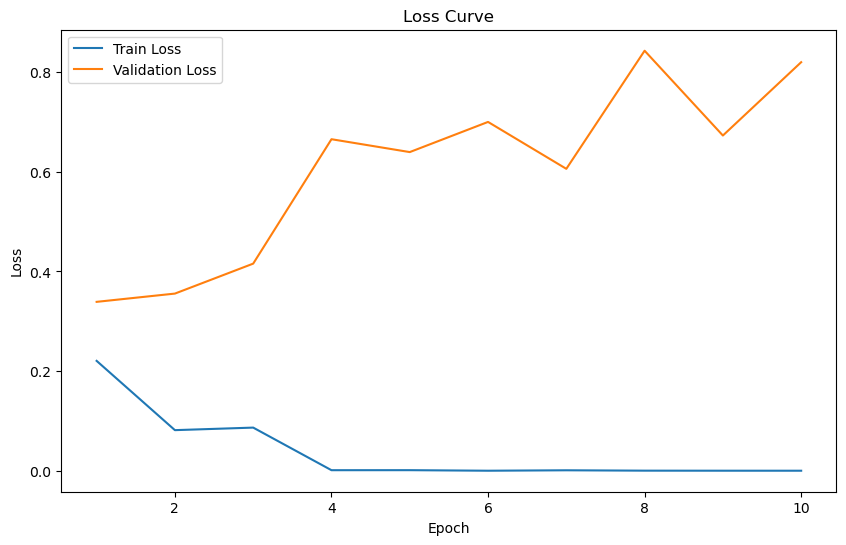

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Loss'], label='Train Loss')
plt.plot(df['Epoch'], df['Val Loss'], label='Validation Loss')

plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')



plt.legend()
plt.grid(False)
plt.show()

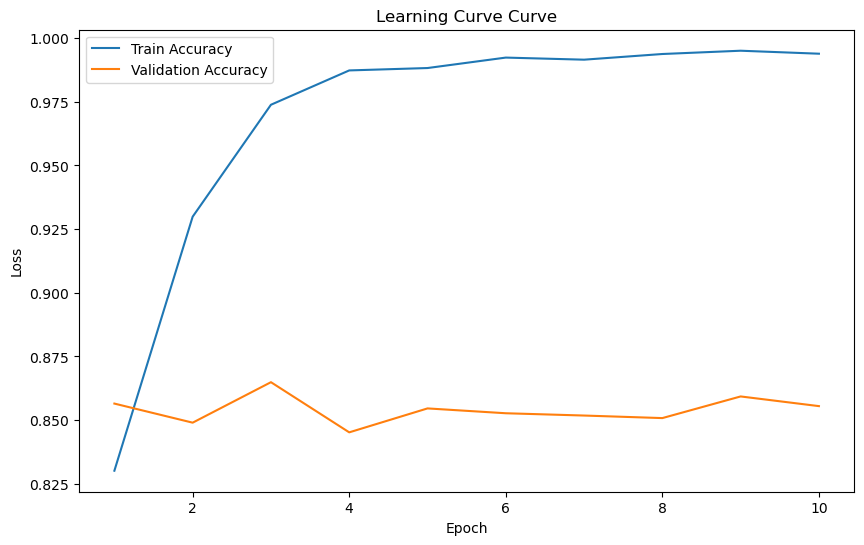

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(df['Epoch'], df['Train Accuracy'], label='Train Accuracy')
plt.plot(df['Epoch'], df['Val Accuracy'], label='Validation Accuracy')

plt.title('Learning Curve Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')



plt.legend()
plt.grid(False)
plt.show()